<a href="https://colab.research.google.com/github/chabhadia-nikhil/PRODIGY_ML_02/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Retrieving Data

In [6]:
data = "/content/drive/MyDrive/prodigy_ml_linearreg/Mall_Customers.csv"
data = pd.read_csv(data)

# Calculating Spendings
If spend score is the percentage of their spending then actucal value that is spent is Spend Score*annual income/100

In [7]:
#if spend score is the percentage of their spending then actucal value that is spent is Spend Score*annual income/100
data['Spending (k$)'] = (data['Annual Income (k$)']*data['Spending Score (1-100)'])/100

# Scatter Plot
Between Annual Income and Spending score

Text(0, 0.5, 'Spending Score (1-100)')

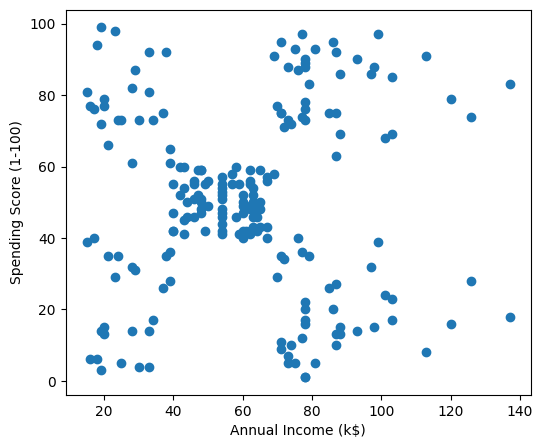

In [8]:
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(5)
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

# Training
Calculating number of clusters to be formed and by plotting inertia graph.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertias')

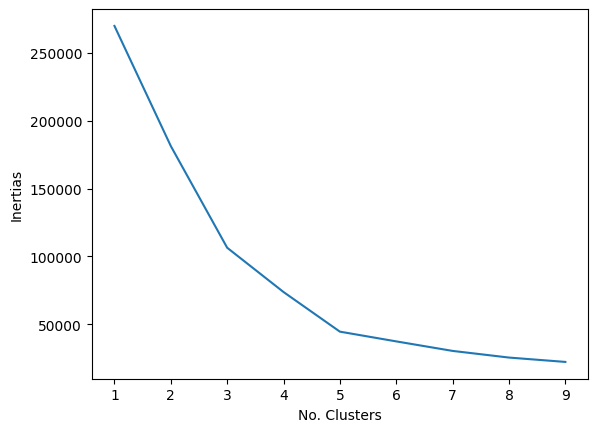

In [9]:
from sklearn.cluster import KMeans
# calculating inertia
inertias =[]
x = np.arange(1,10)
for i in range(1,10):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
  inertias.append(kmeans.inertia_)
plt.plot(x,inertias)
plt.xlabel("No. Clusters")
plt.ylabel("Inertias")

Applying kmeans algorithm

In [10]:
# from the elbow graph we see that cluster should be 5 as it has low inertia and low number of cluster ( we can say that using elbow method 5 is optimal)
kmeans = KMeans(n_clusters = 5)
predicted_class=kmeans.fit_predict(data[['Annual Income (k$)','Spending Score (1-100)']])
data['Predicted Class'] = predicted_class


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


To get location of centroids

In [11]:
cluster_centers=kmeans.cluster_centers_


In [12]:
df0 = data[data['Predicted Class']==0]
df1 = data[data['Predicted Class']==1]
df2 = data[data['Predicted Class']==2]
df3 = data[data['Predicted Class']==3]
df4 = data[data['Predicted Class']==4]


Plotting final Graph

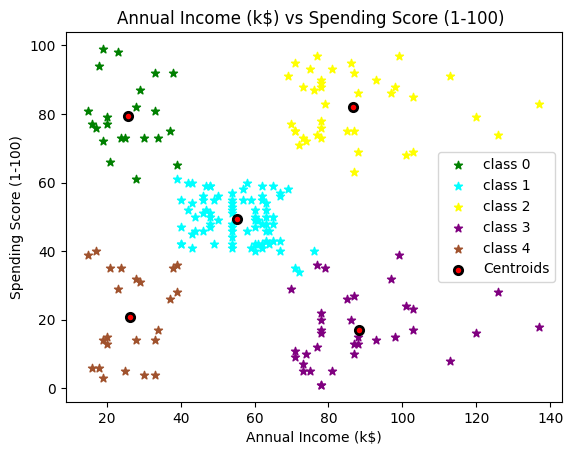

In [17]:
#plotting graph

plt.scatter(x=df0['Annual Income (k$)'],y=df0['Spending Score (1-100)'],c="green",marker="*",label = 'class 0')
plt.scatter(x=df1['Annual Income (k$)'],y=df1['Spending Score (1-100)'],c="cyan",marker="*",label = 'class 1')
plt.scatter(x=df2['Annual Income (k$)'],y=df2['Spending Score (1-100)'],c="yellow",marker="*",label = 'class 2')
plt.scatter(x=df3['Annual Income (k$)'],y=df3['Spending Score (1-100)'],c="purple",marker="*",label = 'class 3')
plt.scatter(x=df4['Annual Income (k$)'],y=df4['Spending Score (1-100)'],c="sienna",marker="*",label = 'class 4')

plt.scatter(x=cluster_centers[:,0],y=cluster_centers[:,1],c="red",linewidths=2,edgecolors="black",label = 'Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) vs Spending Score (1-100) ")
plt.legend()


In [18]:
print("class 0: green color")
print("class 1: cyan color")
print("class 2: yellow color")
print("class 3: purple color")
print("class 4: sienna color")
print("The Red dots are the centroids of that particular class")

class 0: green color
class 1: cyan color
class 2: yellow color
class 3: purple color
class 4: sienna color
The Red dots are the centroids of that particular class
